In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [16]:
# Membaca dataset
df = pd.read_csv('heart_cleveland_upload.csv')

In [17]:
# Misalkan dataset memiliki kolom 'condition' sebagai target dan sisanya sebagai fitur
X = df.drop(columns=['condition'])  # Fitur
y = df['condition']  # Target

In [18]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Reduksi dimensi dengan PCA ke 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [21]:
# Inisialisasi dan latih model SVM
model = SVC(kernel='linear', decision_function_shape='ovr')
model.fit(X_train_pca, y_train)

SVC(kernel='linear')

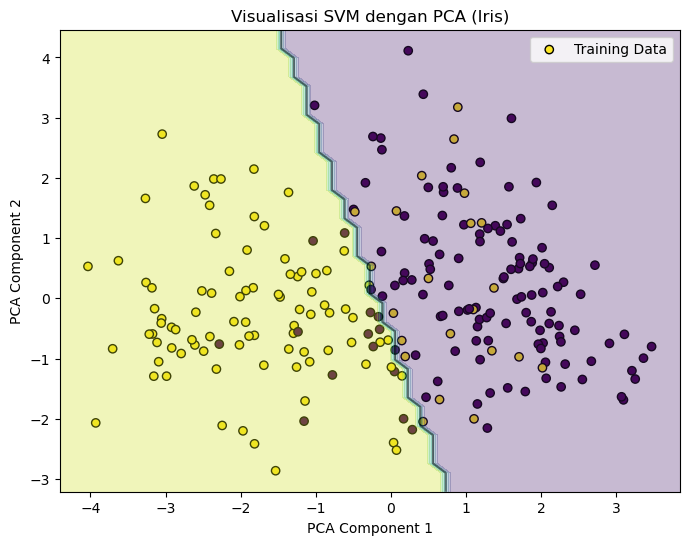

In [22]:
# Visualisasi data dan hyperplane
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolors='k', label='Training Data')

# Mendapatkan batas keputusan
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
#Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
#Z = np.argmax(Z, axis=1)  # Pilih kelas dengan skor tertinggi

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
ax.contour(xx, yy, Z, colors='k', levels=np.arange(-0.5, 3, 1), alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualisasi SVM dengan PCA (Iris)')
plt.legend()
plt.show()

In [23]:
# Evaluasi model
accuracy = accuracy_score(y_test, model.predict(X_test_pca))
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75
